# DS 3001 Final Project - 01: Wrangling/EDA

Luke McMeans (@McMeans), Nithil Suresh (@Nithil-Suresh), [NAME 3] (@[GITHUB 3])

The dataset we chose to analyze is the KenPom Barttorvik set from Kaggle's *March Madness Data*. This dataset provides statistics for each team in the NCAA Division 1 Men's Basketball Tournaments from 2008 to 2024. With these teams, their statstics detail their seeding, the furthest round they played, and a large selection of advanced data which can be found in the [KenPom](https://kenpom.com/) and [Barttorvik](https://www.barttorvik.com/#) ratings at the time for each respective tournament.

We intend to find trends in the data to see who has the best odds of making deep runs in the tournament (and even winning it all). To do this, we plan to build a predictive model that will scrape from the KenPom rating website. KenPom Rating have been well respected in the statstic world of college basketball, and are a common tool to find trends in who are the likely favorite to win the championship. For example, all national champions since 2002 (except for two) have been inside the top 20 for adjusted offensive and defensive efficiency. We want to apply these phenonemon to a Machine Learning level to get a truly in-depth analysis and find underlying trends in the data. Barttorvik Rating will be a valueable addtion to this analysis, as they provide similar insights that can reinforce our findings (along with being easier to access online). Given the prestige of these statistics and their application to the college basketball world, we are confident these sources will prove to be the strongest set of data to predict succesful teams for any given March.

The dataset can be found here: https://www.kaggle.com/datasets/nishaanamin/march-madness-data?resource=download&select=KenPom+Barttorvik.csv

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# load data
df = pd.read_csv('./raw_data/kenpom_barttorvik_raw.csv')
df

,YEAR,CONF,CONF ID,QUAD NO,QUAD ID,TEAM NO,TEAM ID,TEAM,SEED,ROUND,...,BADJT RANK,AVG HGT RANK,EFF HGT RANK,EXP RANK,TALENT RANK,FT% RANK,OP FT% RANK,PPPO RANK,PPPD RANK,ELITE SOS RANK
0,2024,MAC,17,61,1,1079,2,Akron,14,64,...,276,238,199,19,176,164,47,122,51,249
1,2024,SEC,28,63,3,1078,3,Alabama,4,4,...,13,33,8,156,106,10,314,2,263,7
2,2024,P12,24,63,3,1077,8,Arizona,2,16,...,16,50,37,196,7,195,134,8,14,47
3,2024,SEC,28,64,4,1076,12,Auburn,4,64,...,58,86,76,127,69,59,284,12,8,69
4,2024,B12,7,63,3,1075,14,Baylor,3,32,...,274,31,22,304,34,97,254,15,155,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1074,2008,BE,8,1,1,5,235,West Virginia,7,16,...,225,18,115,181,61,209,16,22,32,49
1075,2008,SB,26,1,1,4,236,Western Kentucky,12,16,...,111,160,179,55,131,127,214,27,28,203
1076,2008,BSth,10,4,4,3,239,Winthrop,13,64,...,301,231,206,89,236,339,190,170,12,179
1077,2008,B10,6,3,3,2,240,Wisconsin,3,16,...,301,51,35,98,12,118,117,60,2,57


Since this came from Kaggle, the data are mostly clean. We just need to make some minor changes, like dropping columns and adjusting column names. For the columns, we'll focus on what is easily accessible to the KenPom and Barttovik sites. This leaves us with these 47 columns...

- `year`: year of the tournament
- `team`: the team name
- `team_id`: the unique identifier for the team (tranfers over from year to year)
- `conf`: the conference of the team
- `quad_id`: the quadrant that the team is in
- `seed`: the seeding of the team that year
- `round`: the furthest round the team went

The following columns also have a 'rank' column associated with them, which signals their placement amongst all D1 teams that year...
- `kadj_o`: KenPom adjusted offensive efficiency
- `kadj_d`: KenPom adjusted defensive efficiency
- `kadj_t`: KenPom adjusted tempo (possessions per 40 minutes)
- `badj_o`: Barttorvik adjusted offensive efficiency
- `badj_d`: Barttorvik adjusted defensive efficiency
- `barthag`: Barttorvik power rating (chance of beating average D1 team)
- `efg%`: effective field goal percent
- `efg%d`: opponent's effective field goal percent
- `tov%`: turnover percent
- `tov%d`: opponent's turnover percent
- `oreb%`: offensive rebound percent
- `dreb%`: defensive rebound percent
- `ftr`: ratio of free throw attempts to field goal attempts
- `ftrd`: opponent's ratio of free throw attemps to field goal attempts
- `2pt%`: two point field goal percent
- `2pt%d`: opponent's two point field goal percent
- `3pt%`: three point field goal percent
- `3pt%d`: opponent's three point field goal percent
- `3ptr`: percentage of shots being three pointers
- `3ptrd`: opponent's percentage of shots being three pointers

In [5]:
# convert columns to lowercase, replacing spaces with underscores
df.columns = df.columns.str.lower().str.replace(' ', '_')

# get columns to keep and assign them to the dataframe
kept_cols = ['year', 'team', 'team_id', 'conf', 'quad_id', 'seed', 'round',
             'kadj_o', 'kadj_o_rank', 'kadj_d', 'kadj_d_rank', 'kadj_t', 'kadj_t_rank',
             'badj_o', 'badj_o_rank', 'badj_d', 'badj_d_rank', 'barthag', 'barthag_rank',
             'efg%', 'efg%_rank', 'efg%d', 'efgd%_rank', 'tov%', 'tov%_rank',
             'tov%d', 'tov%d_rank', 'oreb%', 'oreb%_rank', 'dreb%', 'dreb%_rank',
             'ftr', 'ftr_rank', 'ftrd', 'ftrd_rank', '2pt%', '2pt%_rank',
             '2pt%d', '2pt%d_rank', '3pt%', '3pt%_rank', '3pt%d', '3pt%d_rank',
             '3ptr', '3ptr_rank', '3ptrd', '3ptrd_rank']
df = df[kept_cols]
df

,year,team,team_id,conf,quad_id,seed,round,kadj_o,kadj_o_rank,kadj_d,...,2pt%d,2pt%d_rank,3pt%,3pt%_rank,3pt%d,3pt%d_rank,3ptr,3ptr_rank,3ptrd,3ptrd_rank
0,2024,Akron,2,MAC,1,14,64,107.0090,162,102.0720,...,50.7,197,32.0,276,30.0,14,41.5,71,36.8,170
1,2024,Alabama,3,SEC,3,4,4,125.6010,2,103.1180,...,51.1,217,36.5,41,31.9,67,46.8,19,36.7,164
2,2024,Arizona,8,P12,3,2,16,121.1250,8,94.5013,...,47.8,68,37.1,23,33.4,149,32.6,294,38.2,219
3,2024,Auburn,12,SEC,4,4,64,120.5790,10,91.6765,...,42.8,1,35.2,113,29.8,9,37.5,180,33.3,52
4,2024,Baylor,14,B12,3,3,32,122.4900,6,100.1850,...,51.9,249,39.4,7,33.5,154,38.3,153,35.5,112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1074,2008,West Virginia,235,BE,1,7,16,113.5700,33,93.4302,...,45.1,55,35.8,142,35.4,188,35.0,155,32.1,98
1075,2008,Western Kentucky,236,SB,1,12,16,111.0760,54,97.0110,...,46.0,80,38.6,34,32.5,48,32.4,211,31.6,87
1076,2008,Winthrop,239,BSth,4,13,64,99.6932,230,92.3864,...,45.8,76,37.4,79,31.0,23,31.7,231,42.8,332
1077,2008,Wisconsin,240,B10,3,3,16,113.6190,32,86.2081,...,41.3,5,35.9,135,31.1,24,31.1,246,32.8,122


**EDA on NCAA Conferences**

Top 10 conferences that have had the most bids in the NCAA tournament. Each conference sends at least one team to the tournament every year, some conferences get to send more based on the strength of the teams in the conference.

In [23]:
conf_count_df = df['conf'].value_counts().head(10)
conf_count_df

,count
conf,
B10,107
B12,103
BE,101
ACC,96
SEC,84
P12,50
A10,48
MWC,47
WCC,31


<Axes: xlabel='conf'>

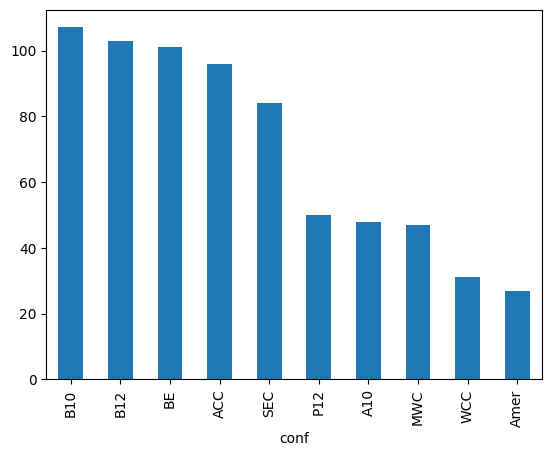

In [25]:
conf_count_df.plot.bar(x = 'conf', y = 'count')

**EDA on Kenpom's Adjusted Offensive Efficiency**

In [32]:
df['kadj_o'].describe()

,kadj_o
count,1079.000000
mean,111.787603
std,5.990357
min,90.890400
25%,108.123500
50%,111.961000
75%,115.918000
max,127.384000


<Axes: >

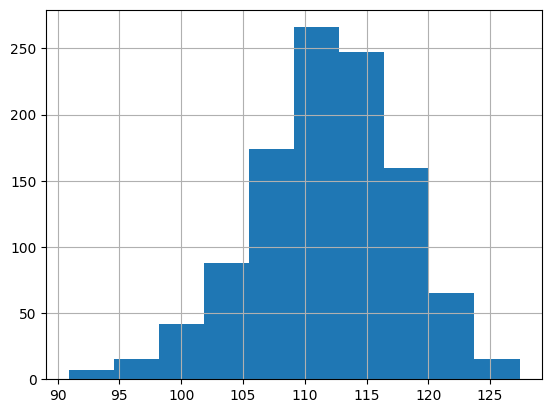

In [26]:
df['kadj_o'].hist()

<Axes: xlabel='kadj_o', ylabel='Density'>

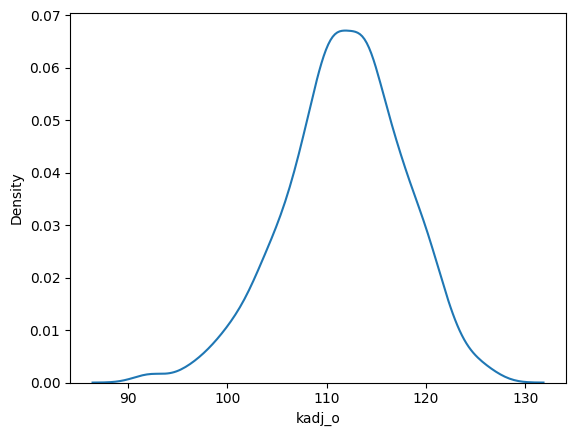

In [28]:
sns.kdeplot(df['kadj_o'])

**EDA on Kenpom's Adjusted Defensive Efficiency**

In [31]:
df['kadj_d'].describe()

,kadj_d
count,1079.000000
mean,96.810198
std,5.417414
min,81.318700
25%,93.213250
50%,96.304600
75%,100.486500
max,118.425000


<Axes: >

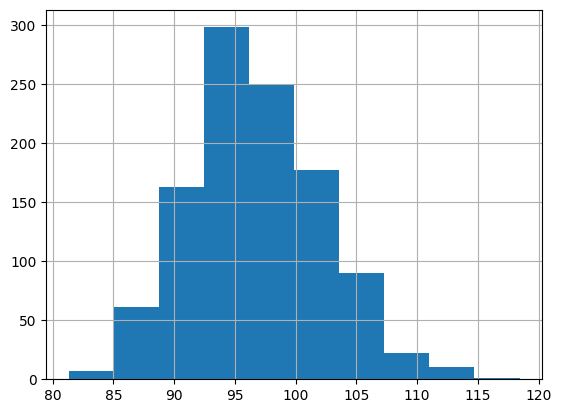

In [29]:
df['kadj_d'].hist()

<Axes: xlabel='kadj_d', ylabel='Density'>

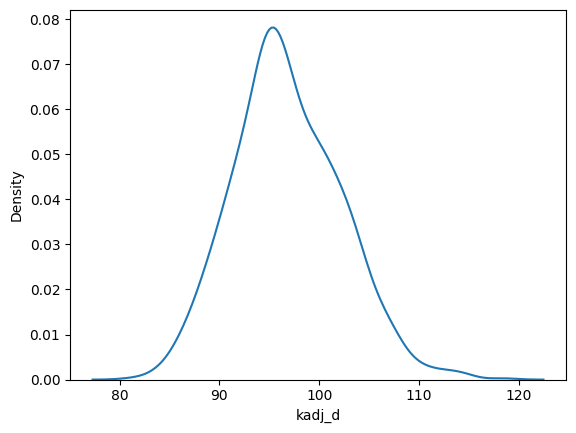

In [33]:
sns.kdeplot(df['kadj_d'])

**KenPom Efficiency Rating Plots by Round**

These plots and summaries will show the relations of the KenPom offense and defense efficiency ratings for the winning and losing teams of each round (not including the First Four).

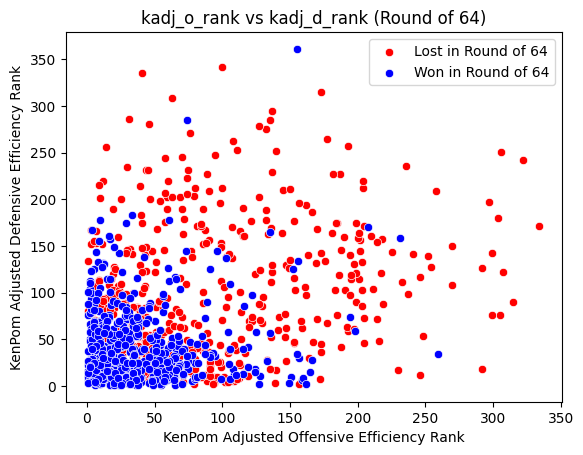

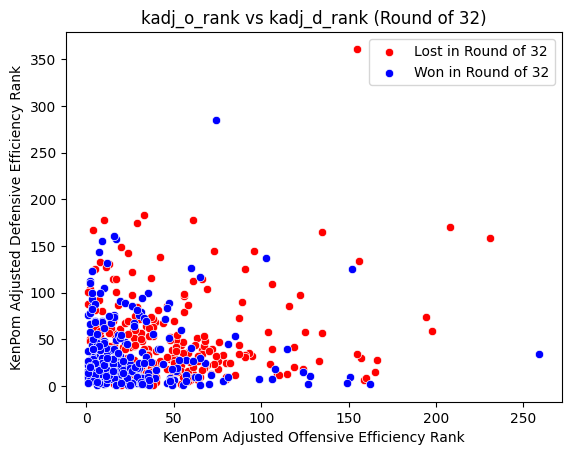

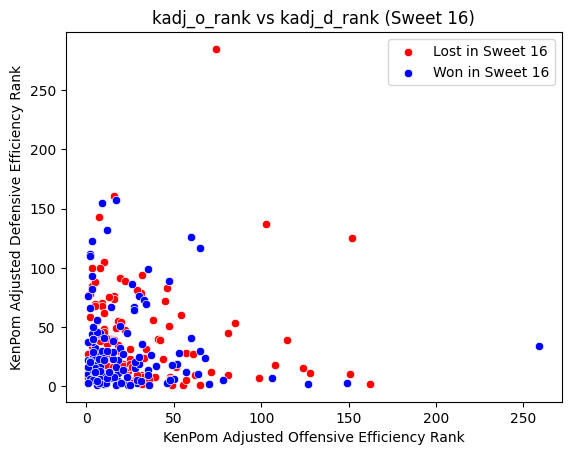

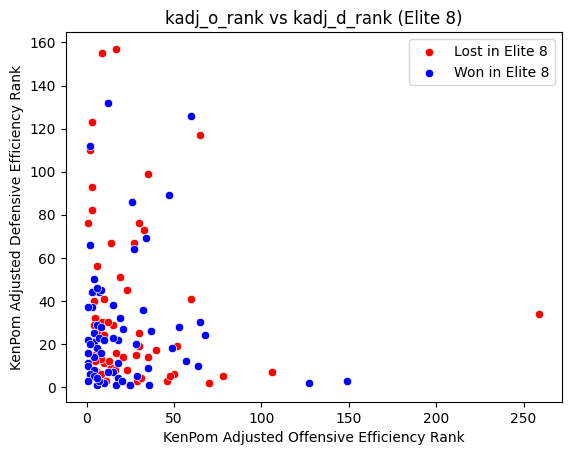

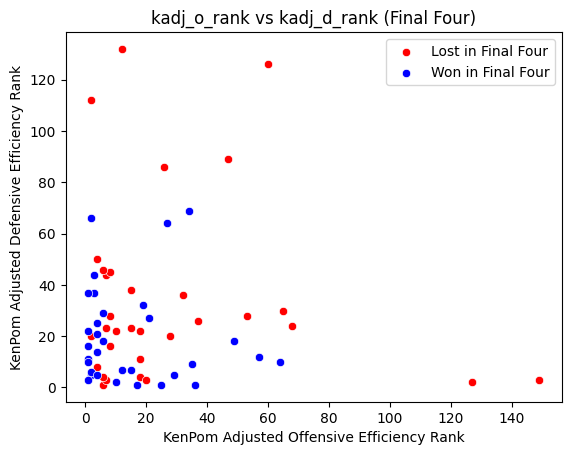

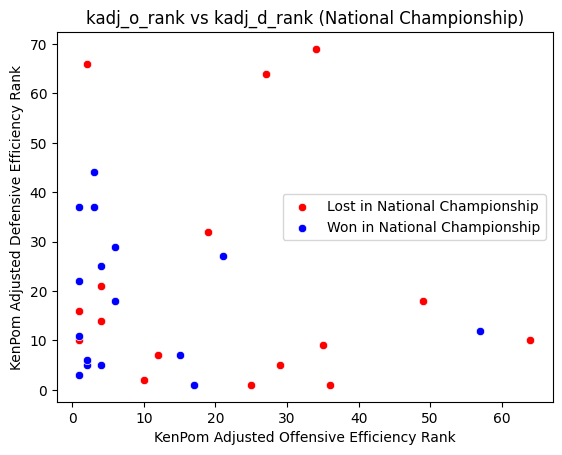

In [6]:
round_names = ['Round of 64', 'Round of 32', 'Sweet 16', 'Elite 8', 'Final Four', 'National Championship']
round_nums = [64, 32, 16, 8, 4, 2]

# function to plot for each round
def plot_winners(r_name, r_num):
    # separate into teams that won round the round and those who didn't
    lost_df = df[df['round'] == r_num]
    won_df = df[df['round'] < r_num]

    # plot scatterplot
    sns.scatterplot(x='kadj_o_rank', y='kadj_d_rank', data=lost_df, color='red', label=f'Lost in {r_name}')
    sns.scatterplot(x='kadj_o_rank', y='kadj_d_rank', data=won_df, color='blue', label=f'Won in {r_name}')
    plt.xlabel('KenPom Adjusted Offensive Efficiency Rank')
    plt.ylabel('KenPom Adjusted Defensive Efficiency Rank')
    plt.title(f'kadj_o_rank vs kadj_d_rank ({r_name})')
    plt.legend()
    plt.show()

# iterate through the rounds
for r_name, r_num in zip(round_names, round_nums):
    plot_winners(r_name, r_num)

Here is the general trend for the plots above. The lighter the dot's color is, the further they advanced in the tournament.

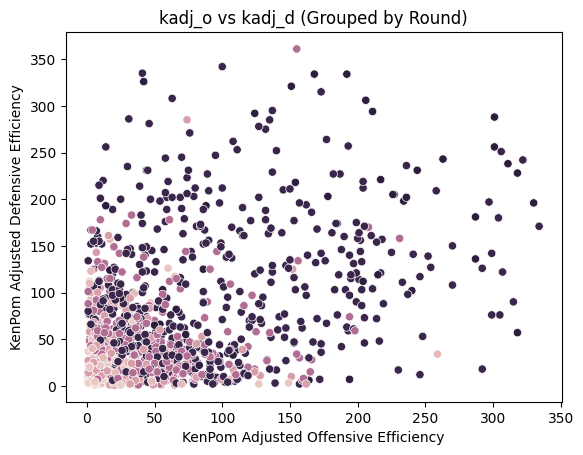

In [ ]:
# plot scatterplot for entire df grouped by round
sns.scatterplot(x='kadj_o_rank', y='kadj_d_rank', data=df, hue='round')
plt.xlabel('KenPom Adjusted Offensive Efficiency')
plt.ylabel('KenPom Adjusted Defensive Efficiency')
plt.title('kadj_o vs kadj_d (Grouped by Round)')
plt.legend([],[], frameon=False) # hide legend because it's weren't respective of the column
plt.show()

In [ ]:
# print summaries for kadj_o grouped by round
print('KenPom Adjusted Offense Efficiency by Round')
df.groupby('round')['kadj_o'].describe()

KenPom Adjusted Offense Efficiency by Round


,count,mean,std,min,25%,50%,75%,max
round,,,,,,,,
1,16.0,120.543313,4.372624,111.3550,119.04675,120.9995,123.34150,127.384
2,16.0,117.307750,5.385366,110.7450,112.72250,115.9830,120.93575,126.815
4,32.0,116.054656,4.631842,105.2070,113.57925,117.3070,119.03225,125.601
8,64.0,116.610972,4.726576,98.7512,114.30200,116.8010,119.70675,125.551
16,128.0,115.060648,4.349461,103.1570,112.38300,115.1365,118.19875,123.643
32,256.0,112.893828,4.501551,99.5279,109.93200,112.6055,116.13900,125.701
64,512.0,109.706883,5.613790,91.8221,106.17575,109.9900,113.61825,124.834
68,55.0,106.142702,7.169454,90.8904,100.92150,106.3750,111.08950,120.873


In [ ]:
print('KenPom Adjusted Defense Efficiency by Round')
df.groupby('round')['kadj_d'].describe()

KenPom Adjusted Defense Efficiency by Round


,count,mean,std,min,25%,50%,75%,max
round,,,,,,,,
1,16.0,91.702050,3.588160,83.1717,88.607725,93.43425,94.073250,95.9749
2,16.0,91.880212,3.794853,85.3169,89.402375,92.19195,95.255900,97.2780
4,32.0,93.459287,4.822027,83.8367,90.301350,92.55895,96.203250,103.3190
8,64.0,93.441788,4.489782,83.8490,90.560575,92.95905,95.715325,103.7090
16,128.0,93.697688,4.375843,81.3187,90.542775,94.03995,96.711600,107.4400
32,256.0,95.458410,4.194995,84.4292,92.650450,95.04675,97.777800,118.4250
64,512.0,98.632933,5.138483,84.3753,95.076400,98.67215,102.541000,114.4500
68,55.0,102.167218,6.004346,91.3344,97.688050,101.83500,106.027500,114.5830


**Plots for Barthag**

This summary shows the relations of Barthag ratings (and rank) for teams of each round.

In [ ]:
# print summaries for kadj_o grouped by round
print('Barthag Rank by Round')
df.groupby('round')['barthag_rank'].describe()

Barthag Rank by Round


,count,mean,std,min,25%,50%,75%,max
round,,,,,,,,
1,16.0,5.062500,6.223276,1.0,2.00,3.0,4.25,23.0
2,16.0,12.250000,12.309888,1.0,2.75,7.5,16.50,44.0
4,32.0,19.468750,20.144613,1.0,6.00,12.0,26.25,86.0
8,64.0,17.140625,20.668101,1.0,5.75,10.0,21.00,127.0
16,128.0,22.515625,22.637501,1.0,8.75,16.5,28.25,156.0
32,256.0,38.496094,34.756520,2.0,16.00,31.0,47.00,307.0
64,512.0,82.871094,63.146329,1.0,32.00,60.5,126.25,309.0
68,55.0,148.163636,98.893276,14.0,58.50,151.0,230.00,320.0


This is where we stand for now. We can see a lot of interesting outliers as we advance through the rounds. For example, theres been an instance of the top Barthag team getting upset in the first round, a mark that has yet to occur in the second round. Unfortuantley, this was the 2018 UVA team, who became the victim of the first ever 16-1 upset. Along with this, we can observe 15-seed Saint Peter's historic Elite 8 run in 2022 as they're the only team to reach that round with a KenPom offensive rating below 150. It'll be interesting to see what upsets we could possibly find in our predictions.

In terms of the challenges we've faced, there were a lot of columns to analyze what we truly needed. Of the original 103, we've trimmed it down to 47. This wasn't necessarily a difficult process, but rather tedious to write out. From this, we assume it'll be difficult to scrape all the data from KenPom and Barttorvik sites, as there is lots of data to manage and pull from these sites.